In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision 

In [ ]:
batch_size = 8
num_epochs = 10
num_classes = 10
noise_std = 0.5

In [ ]:
# Importing Mnist dataset from torchvision dataset

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
valset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

print(trainset)

# Create dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Implementing a function that transforms tensors to numpy arrays and show the image 

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.show()

## Defining the model :

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, num_classes):
        super(AutoEncoder, self).__init__()

        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(1,4,3,padding = 1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3,padding = 1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3,padding = 2)
        self.upsample = nn.Upsample(scale_factor=(2,2))
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3,padding = 1)
        self.conv5 = nn.Conv2d(16, 8, kernel_size=3,padding = 1)
        self.conv6 = nn.Conv2d(8, 4, kernel_size=3,padding = 0)
        self.m = nn.Sigmoid()
        self.conv7 = nn.Conv2d(4, 1, kernel_size=3,padding = 1)

    def forward(self, x):

        #ENCODER
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        
        #DECODER  
        out = self.upsample(self.relu(self.conv4(out)))
        out = self.upsample(self.relu(self.conv5(out)))
        out = self.upsample(self.relu(self.conv6(out)))

        out = self.conv7(out)
        
        return out
model = AutoEncoder(10)

## Train the model with learning rate = 1e-3 : 

Epoch 0:
>> TRAIN: Epoch 0 completed | tr_loss: 0.0138
Epoch 1:
>> TRAIN: Epoch 1 completed | tr_loss: 0.0091
Epoch 2:
>> TRAIN: Epoch 2 completed | tr_loss: 0.0084
Epoch 3:
>> TRAIN: Epoch 3 completed | tr_loss: 0.0082
Epoch 4:
>> TRAIN: Epoch 4 completed | tr_loss: 0.0081
Epoch 5:
>> TRAIN: Epoch 5 completed | tr_loss: 0.0080
Epoch 6:
>> TRAIN: Epoch 6 completed | tr_loss: 0.0080
Epoch 7:
>> TRAIN: Epoch 7 completed | tr_loss: 0.0079
Epoch 8:
>> TRAIN: Epoch 8 completed | tr_loss: 0.0079
Epoch 9:
>> TRAIN: Epoch 9 completed | tr_loss: 0.0079


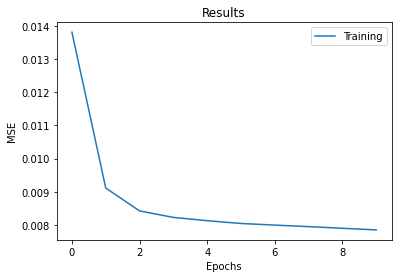

In [ ]:
model = AutoEncoder(10)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)

tr_losses = np.zeros(num_epochs)

for epoch_nr in range(num_epochs):

    print("Epoch {}:".format(epoch_nr))
    # Train model
    running_loss = 0.0
    for batch_data, _ in trainloader:

        # Put data on device
        batch_data = batch_data
        noisy_data = batch_data + (noise_std**0.5)*torch.randn_like(batch_data)

        # Predict and get loss
        output = model(noisy_data)
        loss = criterion(output, batch_data)

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    tr_loss = running_loss/len(trainloader.dataset)
    print('>> TRAIN: Epoch {} completed | tr_loss: {:.4f}'.format(
        epoch_nr, running_loss/len(trainloader.dataset)))  
    tr_losses[epoch_nr] = tr_loss 
        
plt.figure()
plt.plot(tr_losses, label='Training')
plt.title('Results')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Denoised image and residual image of the previous model :

torch.Size([8, 1, 28, 28])
original image


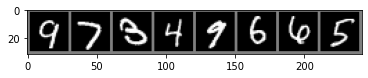

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


noisy image


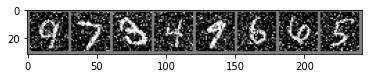

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


denoised image


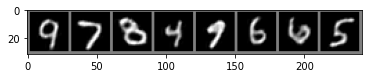

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


noise extracted


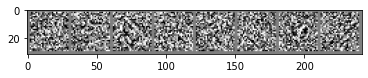

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


original image + noise extracted


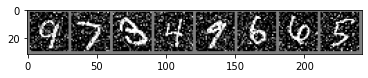


real std of the noise :      0.7071067811865476

std of the predicted noise : 0.7470874786376953


In [ ]:
dataiter = iter(valloader)
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()

print(example_images.shape)

# Show images
print('original image')
imshow(torchvision.utils.make_grid(example_images))
noisy_data = example_images + (noise_std**0.5)*torch.randn_like(example_images)
print('noisy image')
imshow(torchvision.utils.make_grid(noisy_data))
preds = model(noisy_data)
print('denoised image')
imshow(torchvision.utils.make_grid(preds))

noise = noisy_data - preds
print('noise extracted')
imshow(torchvision.utils.make_grid(noise))

print('original image + noise extracted')
imshow(torchvision.utils.make_grid(noise + example_images))

print('\nreal std of the noise :      ' + str(noise_std**0.5) + '\n')
print('std of the predicted noise : ' + str(float(torch.std(noise))))

## Train the model with learning rate = 1e-2 : 

Epoch 0:
>> TRAIN: Epoch 0 completed | tr_loss: 0.0178
Epoch 1:
>> TRAIN: Epoch 1 completed | tr_loss: 0.0138
Epoch 2:
>> TRAIN: Epoch 2 completed | tr_loss: 0.0135
Epoch 3:
>> TRAIN: Epoch 3 completed | tr_loss: 0.0134
Epoch 4:
>> TRAIN: Epoch 4 completed | tr_loss: 0.0133
Epoch 5:
>> TRAIN: Epoch 5 completed | tr_loss: 0.0133
Epoch 6:
>> TRAIN: Epoch 6 completed | tr_loss: 0.0132
Epoch 7:
>> TRAIN: Epoch 7 completed | tr_loss: 0.0131
Epoch 8:
>> TRAIN: Epoch 8 completed | tr_loss: 0.0129
Epoch 9:
>> TRAIN: Epoch 9 completed | tr_loss: 0.0128


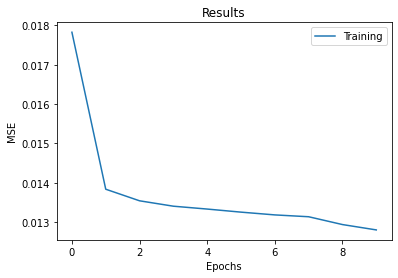

In [ ]:
model = AutoEncoder(10)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-2)

tr_losses = np.zeros(num_epochs)

for epoch_nr in range(num_epochs):

    print("Epoch {}:".format(epoch_nr))
    # Train model
    running_loss = 0.0
    for batch_data, _ in trainloader:

        # Put data on device
        batch_data = batch_data
        noisy_data = batch_data + (noise_std**0.5)*torch.randn_like(batch_data)

        # Predict and get loss
        output = model(noisy_data)
        loss = criterion(output, batch_data)

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    tr_loss = running_loss/len(trainloader.dataset)
    print('>> TRAIN: Epoch {} completed | tr_loss: {:.4f}'.format(
        epoch_nr, running_loss/len(trainloader.dataset)))  
    tr_losses[epoch_nr] = tr_loss 
        
plt.figure()
plt.plot(tr_losses, label='Training')
plt.title('Results')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Denoised image and residual image of the previous model :

torch.Size([8, 1, 28, 28])


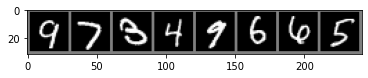

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


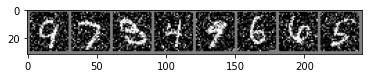

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


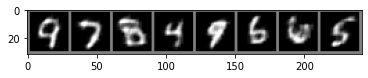

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


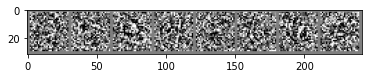

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


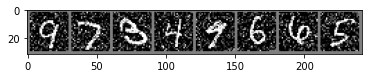


real std of the noise :      0.7071067811865476

std of the predicted noise : 0.7731616497039795


In [ ]:
dataiter = iter(valloader)
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()

print(example_images.shape)

# Show images
imshow(torchvision.utils.make_grid(example_images))
noisy_data = example_images + (noise_std**0.5)*torch.randn_like(example_images)
imshow(torchvision.utils.make_grid(noisy_data))
preds = model(noisy_data)
imshow(torchvision.utils.make_grid(preds))

noise = noisy_data - preds
imshow(torchvision.utils.make_grid(noise))

imshow(torchvision.utils.make_grid(noise + example_images))

print('\nreal std of the noise :      ' + str(noise_std**0.5) + '\n')
print('std of the predicted noise : ' + str(float(torch.std(noise))))

We have :

learning rate = 1e-3 --> std of the predicted noise : 0.7470874786376953

learning rate = 1e-2 --> std of the predicted noise : 0.7731616497039795

real std of the noise : 0.7071067811865476

This proves that Adam optimizer with lr = 1e-3 is performing better than Adam optimizer with lr = 1e-2




#Training the model on another data set : 

In [ ]:
# Load dataset

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

other_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
other_valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Create dataloaders
CIFAR_trainloader = torch.utils.data.DataLoader(other_trainset, batch_size=batch_size,
                                          shuffle=True)
CIFAR_valloader = torch.utils.data.DataLoader(other_valset, batch_size=batch_size,
                                         shuffle=False)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, num_classes):
        super(AutoEncoder, self).__init__()

        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(3,4,3,padding = 1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3,padding = 1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3,padding = 2)
        self.upsample = nn.Upsample(scale_factor=(2,2))
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3,padding = 1)
        self.conv5 = nn.Conv2d(16, 8, kernel_size=3,padding = 1)
        self.conv6 = nn.Conv2d(8, 4, kernel_size=3,padding = 1)
        self.m = nn.Sigmoid()
        self.conv7 = nn.Conv2d(4, 4, kernel_size=5,padding = 0)
        self.conv8 = nn.Conv2d(4, 3, kernel_size=5,padding = 0)

    def forward(self, x):

        #ENCODER
        #print(x.shape)
        out = self.pool(self.relu(self.conv1(x)))
        #print(out.shape)
        out = self.pool(self.relu(self.conv2(out)))
        #print(out.shape)
        out = self.pool(self.relu(self.conv3(out)))
        #print(out.shape)
        
        #DECODER  
        out = self.upsample(self.relu(self.conv4(out)))
        #print(out.shape)
        out = self.upsample(self.relu(self.conv5(out)))
        #print(out.shape)
        out = self.upsample(self.relu(self.conv6(out)))
        #print(out.shape)

        out = self.conv7(out)
        #print(out.shape)

        out = self.conv8(out)
        #print(out.shape)
        
        return out
model = AutoEncoder(10)

In [ ]:
# new noise_std value
noise_std = 0.2

Epoch 0:


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


>> TRAIN: Epoch 0 completed | tr_loss: 0.0075
Epoch 1:
>> TRAIN: Epoch 1 completed | tr_loss: 0.0056
Epoch 2:
>> TRAIN: Epoch 2 completed | tr_loss: 0.0053
Epoch 3:
>> TRAIN: Epoch 3 completed | tr_loss: 0.0052
Epoch 4:
>> TRAIN: Epoch 4 completed | tr_loss: 0.0051
Epoch 5:
>> TRAIN: Epoch 5 completed | tr_loss: 0.0050
Epoch 6:
>> TRAIN: Epoch 6 completed | tr_loss: 0.0050
Epoch 7:
>> TRAIN: Epoch 7 completed | tr_loss: 0.0049
Epoch 8:
>> TRAIN: Epoch 8 completed | tr_loss: 0.0049
Epoch 9:
>> TRAIN: Epoch 9 completed | tr_loss: 0.0048


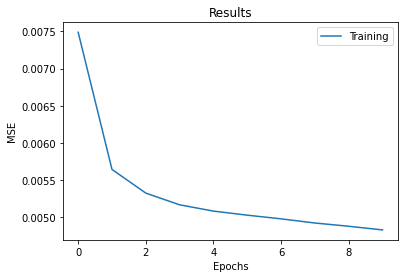

In [ ]:
model = AutoEncoder(10)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)

tr_losses = np.zeros(num_epochs)

for epoch_nr in range(num_epochs):

    print("Epoch {}:".format(epoch_nr))
    # Train model
    running_loss = 0.0
    for batch_data, _ in CIFAR_trainloader:

        # Put data on device
        batch_data = batch_data
        noisy_data = batch_data + (noise_std**0.5)*torch.randn_like(batch_data)

        # Predict and get loss
        output = model(noisy_data)
        loss = criterion(output, batch_data)

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    tr_loss = running_loss/len(CIFAR_trainloader.dataset)
    print('>> TRAIN: Epoch {} completed | tr_loss: {:.4f}'.format(
        epoch_nr, running_loss/len(CIFAR_trainloader.dataset)))  
    tr_losses[epoch_nr] = tr_loss 
        
plt.figure()
plt.plot(tr_losses, label='Training')
plt.title('Results')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

torch.Size([8, 3, 32, 32])


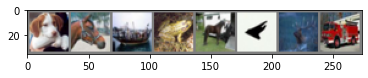

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


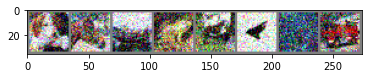

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


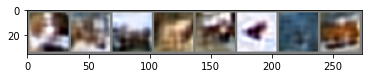

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


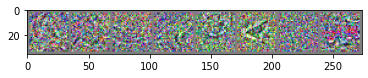

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


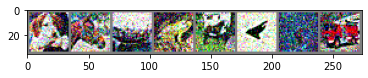


real std of the noise :      0.4472135954999579

std of the predicted noise : 0.4851651191711426


In [ ]:
dataiter = iter(CIFAR_valloader)
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()

print(example_images.shape)

# Show images
imshow(torchvision.utils.make_grid(example_images))
noisy_data = example_images + (noise_std**0.5)*torch.randn_like(example_images)
imshow(torchvision.utils.make_grid(noisy_data))
preds = model(noisy_data)
imshow(torchvision.utils.make_grid(preds))

noise = noisy_data - preds
imshow(torchvision.utils.make_grid(noise))

imshow(torchvision.utils.make_grid(noise + example_images))

print('\nreal std of the noise :      ' + str(noise_std**0.5) + '\n')
print('std of the predicted noise : ' + str(float(torch.std(noise))))

## Adding 10 other epochs to the previous model in order to improve it :

Epoch 0:
>> TRAIN: Epoch 0 completed | tr_loss: 0.0048
Epoch 1:
>> TRAIN: Epoch 1 completed | tr_loss: 0.0047
Epoch 2:
>> TRAIN: Epoch 2 completed | tr_loss: 0.0047
Epoch 3:
>> TRAIN: Epoch 3 completed | tr_loss: 0.0047
Epoch 4:
>> TRAIN: Epoch 4 completed | tr_loss: 0.0047
Epoch 5:
>> TRAIN: Epoch 5 completed | tr_loss: 0.0046
Epoch 6:
>> TRAIN: Epoch 6 completed | tr_loss: 0.0046
Epoch 7:
>> TRAIN: Epoch 7 completed | tr_loss: 0.0045
Epoch 8:
>> TRAIN: Epoch 8 completed | tr_loss: 0.0045
Epoch 9:
>> TRAIN: Epoch 9 completed | tr_loss: 0.0045


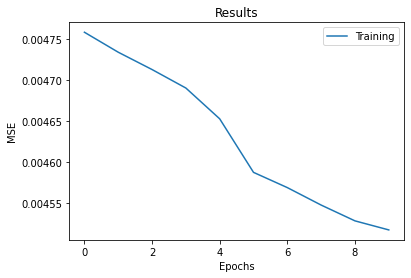

In [ ]:
tr_losses = np.zeros(num_epochs)

for epoch_nr in range(num_epochs):

    print("Epoch {}:".format(epoch_nr))
    # Train model
    running_loss = 0.0
    for batch_data, _ in CIFAR_trainloader:

        # Put data on device
        batch_data = batch_data
        noisy_data = batch_data + (noise_std**0.5)*torch.randn_like(batch_data)

        # Predict and get loss
        output = model(noisy_data)
        loss = criterion(output, batch_data)

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    tr_loss = running_loss/len(CIFAR_trainloader.dataset)
    print('>> TRAIN: Epoch {} completed | tr_loss: {:.4f}'.format(
        epoch_nr, running_loss/len(CIFAR_trainloader.dataset)))  
    tr_losses[epoch_nr] = tr_loss 
        
plt.figure()
plt.plot(tr_losses, label='Training')
plt.title('Results')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

torch.Size([8, 3, 32, 32])


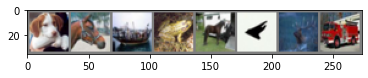

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


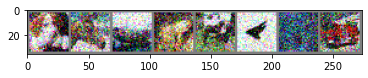

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


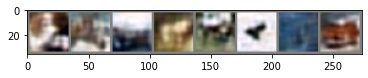

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


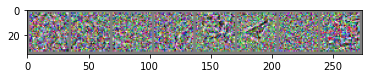

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


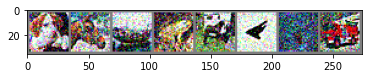


real std of the noise :      0.4472135954999579

std of the predicted noise : 0.47989773750305176


In [ ]:
dataiter = iter(CIFAR_valloader)
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()
example_images, _ = dataiter.next()

print(example_images.shape)

# Show images
imshow(torchvision.utils.make_grid(example_images))
noisy_data = example_images + (noise_std**0.5)*torch.randn_like(example_images)
imshow(torchvision.utils.make_grid(noisy_data))
preds = model(noisy_data)
imshow(torchvision.utils.make_grid(preds))

noise = noisy_data - preds
imshow(torchvision.utils.make_grid(noise))

imshow(torchvision.utils.make_grid(noise + example_images))

print('\nreal std of the noise :      ' + str(noise_std**0.5) + '\n')
print('std of the predicted noise : ' + str(float(torch.std(noise))))

## We remark that there is a slight difference in the predicted std of the noise (0.485 < 0.479 ) and get closer to the real noise std (0.447) which proves that the model is performing a little bit better.  